## Bike Sharing Data Analysis and Predictive Modeling

In this project, we comprehensively analyzed a bike sharing dataset using Python libraries such as NumPy, Pandas, Seaborn, and Scikit-Learn. Our exploration encompassed data preprocessing, visualization of bike ride trends across seasons, working days, months, and weather situations. We then delved into predictive modeling, evaluating diverse regression algorithms, and employing techniques like cross-validation and hyperparameter tuning for optimal model performance. The project aimed to provide valuable insights into bike sharing patterns and create accurate predictive models for bike ride counts.

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet, Ridge
from prettytable import PrettyTable

In [43]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv('bike_share_hour.csv')

In [44]:
# Display the first few rows of the dataframe to verify it has been read successfully
print(df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [45]:
# List of categorical columns
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Convert the categorical columns to "category" type
df[categorical_columns] = df[categorical_columns].astype('category')

# Verify the data types after conversion
print(df.dtypes)

instant          int64
dteday          object
season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object


In [46]:
# Look for non-null values in the dataset
print(df.info())

# Do a descriptive analysis of the numeric columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  category
 4   mnth        17379 non-null  category
 5   hr          17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(4), object(1)
memory usage: 1.3+ MB
None
          ins

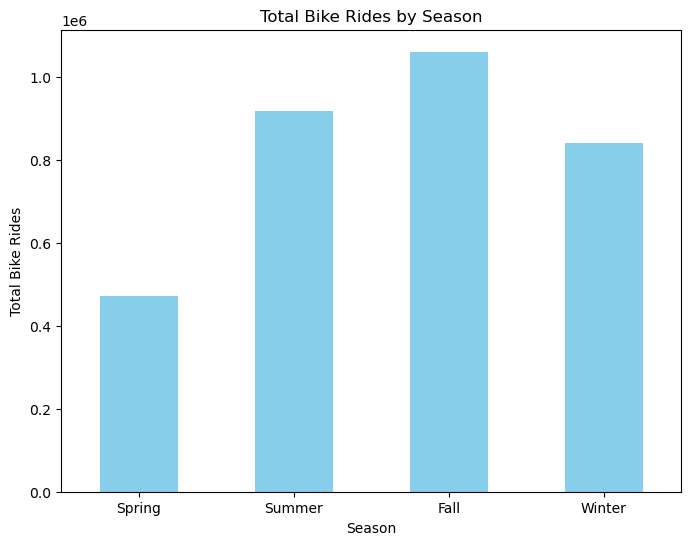

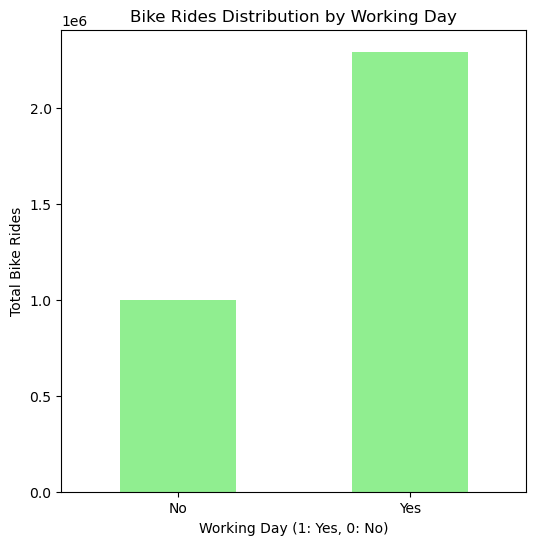

In [47]:
# Bar plot of cnt versus season
plt.figure(figsize=(8, 6))
season_counts = df.groupby('season')['cnt'].sum()
season_counts.plot(kind='bar', color='skyblue')
plt.title('Total Bike Rides by Season')
plt.xlabel('Season')
plt.ylabel('Total Bike Rides')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)
plt.show()

# Bar plot of workingday versus count
plt.figure(figsize=(6, 6))
workingday_counts = df.groupby('workingday')['cnt'].sum()
workingday_counts.plot(kind='bar', color='lightgreen')
plt.title('Bike Rides Distribution by Working Day')
plt.xlabel('Working Day (1: Yes, 0: No)')
plt.ylabel('Total Bike Rides')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

In the **first bar plot**, *"Total Bike Rides by Season,"* we can observe the distribution of bike rides across different seasons. The x-axis represents the seasons (Spring, Summer, Fall, and Winter), and the y-axis represents the total number of bike rides (*cnt*) for each season. Fall had the most bike rides and Spring had the fewest.

In the **second bar plot**, *"Bike Rides Distribution by Working Day,"* we can see how bike rides are distributed across working days (1) and non-working days (0). The x-axis represents whether it's a working day (1) or not (0), and the y-axis represents the total number of bike rides (*cnt*) for each class.

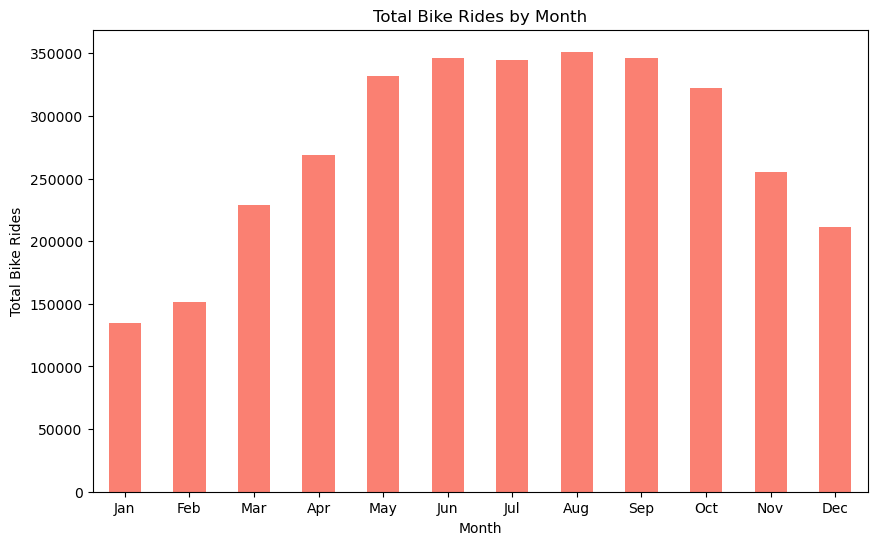

In [48]:
# Bar chart of cnt versus month
plt.figure(figsize=(10, 6))
month_counts = df.groupby('mnth')['cnt'].sum()
month_counts.plot(kind='bar', color='salmon')
plt.title('Total Bike Rides by Month')
plt.xlabel('Month')
plt.ylabel('Total Bike Rides')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

In the **third bar plot**, *"Total Bike Rides by Month,"* we explore the distribution of bike rides throughout the year. The x-axis represents the months, and the y-axis represents the total number of bike rides (*cnt*) for each month. Notably, **June, July, August, and September** have the most bike rides, showcasing high demand during the summer months.

In [49]:
# Define a dictionary to map months to seasons
season_mapping = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

# Add a new column 'season' to the dataframe based on the 'mnth' column
df['season'] = df['mnth'].map(season_mapping)

# Display the first few rows of the dataframe with the 'season' column
print(df[['mnth', 'season']])

      mnth  season
0        1  Winter
1        1  Winter
2        1  Winter
3        1  Winter
4        1  Winter
...    ...     ...
17374   12  Winter
17375   12  Winter
17376   12  Winter
17377   12  Winter
17378   12  Winter

[17379 rows x 2 columns]


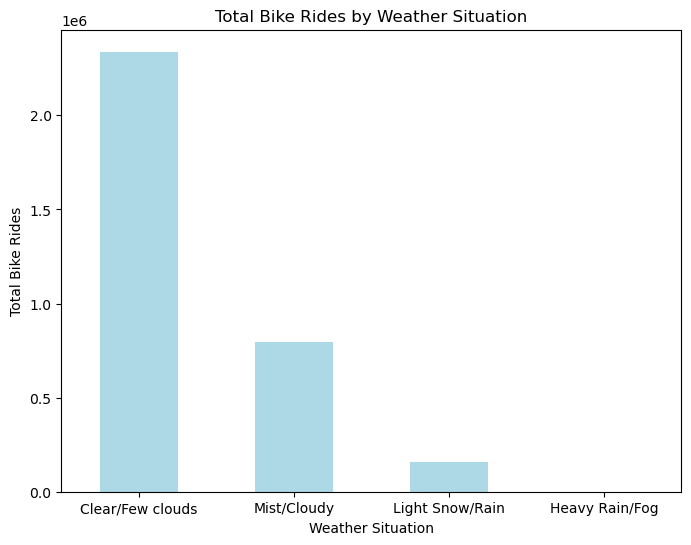

In [50]:
# Bar plot of weathersit versus cnt
plt.figure(figsize=(8, 6))
weather_counts = df.groupby('weathersit')['cnt'].sum()
weather_counts.plot(kind='bar', color='lightblue')
plt.title('Total Bike Rides by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Bike Rides')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear/Few clouds', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Fog'], rotation=0)
plt.show()

## Exploring Bike Rentals in Different Weather Situations

The above **bar plot** is generated to visualize the distribution of bike rides based on different weather situations. The x-axis represents the weather situations, while the y-axis represents the total number of bike rides (*cnt*) for each situation. The labels on the x-axis indicate the corresponding weather descriptions. 

Interestingly, the weather situation '**Heavy Rain/Fog**' stands out with the fewest bike rentals. This insight highlights the impact of weather conditions on bike rental patterns.

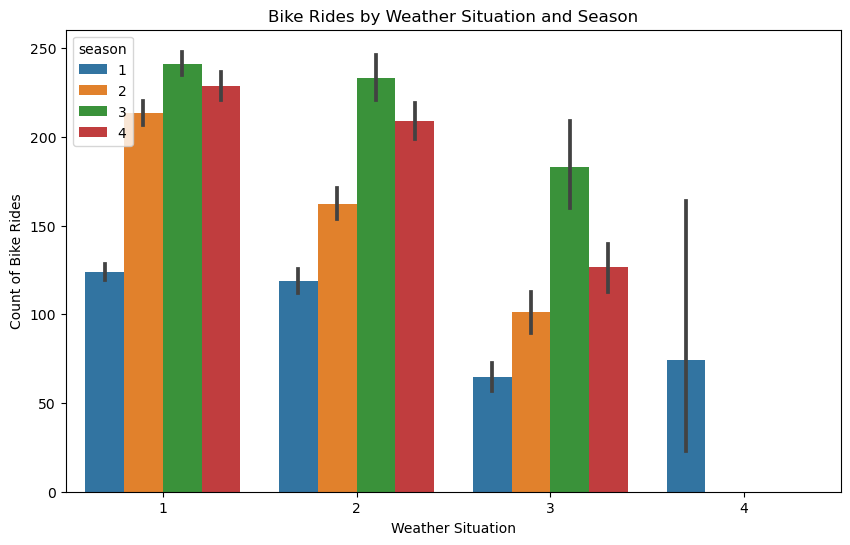

In [53]:
# Replace 'Unknown Weather' and 'Unknown Season' with appropriate numerical values (e.g., 0)
df['weathersit'].replace({'Unknown Weather': 0}, inplace=True)
df['season'].replace({'Unknown Season': 0, 'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}, inplace=True)

# Convert 'weathersit' column to numerical data type (integer)
df['weathersit'] = df['weathersit'].astype(int)

# Create the bar plot with hue as 'season'
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='weathersit', y='cnt', hue='season')
plt.title('Bike Rides by Weather Situation and Season')
plt.xlabel('Weather Situation')
plt.ylabel('Count of Bike Rides')
plt.show()

Spring (Season 1):

- Weather Situation 1 (Clear/Few clouds): The count of bike rides is the highest among all weather situations for this season.
- Weather Situation 2 (Mist/Cloudy): The count of bike rides is lower compared to Weather Situation 1 but still relatively high.
- Weather Situation 3 (Light Snow/Rain): The count of bike rides is the lowest among all weather situations for this season.
- Weather Situation 4 (Heavy Rain/Fog): There are no bike rides recorded for this weather situation in Spring.

Summer (Season 2):

- Weather Situation 1 (Clear/Few clouds): The count of bike rides is the highest among all weather situations for this season.
- Weather Situation 2 (Mist/Cloudy): The count of bike rides is lower compared to Weather Situation 1 but still relatively high.
- Weather Situation 3 (Light Snow/Rain): There are no bike rides recorded for this weather situation in Summer.
- Weather Situation 4 (Heavy Rain/Fog): There are no bike rides recorded for this weather situation in Summer.

Fall (Season 3):

- Weather Situation 1 (Clear/Few clouds): The count of bike rides is the highest among all weather situations for this season.
- Weather Situation 2 (Mist/Cloudy): The count of bike rides is lower compared to Weather Situation 1 but still relatively high.
- Weather Situation 3 (Light Snow/Rain): The count of bike rides is the lowest among all weather situations for this season.
- Weather Situation 4 (Heavy Rain/Fog): There are no bike rides recorded for this weather situation in Fall.

Winter (Season 4):

- Weather Situation 1 (Clear/Few clouds): The count of bike rides is the highest among all weather situations for this season.
- Weather Situation 2 (Mist/Cloudy): The count of bike rides is lower compared to Weather Situation 1 but still relatively high.
- Weather Situation 3 (Light Snow/Rain): The count of bike rides is the lowest among all weather situations for this season.
- Weather Situation 4 (Heavy Rain/Fog): The count of bike rides is relatively low but still recorded some rides.

**Based on the bar plot**, we can observe that certain weather situations, such as *"Clear/Few clouds,"* generally lead to higher bike ride counts in all seasons, while *"Light Snow/Rain"* results in the lowest bike ride counts. Additionally, *"Mist/Cloudy"* weather situations tend to have a moderate impact on bike ride counts. Moreover, weather situations like *"Heavy Rain/Fog"* often deter people from riding bikes, leading to **zero bike rides** recorded in some cases.

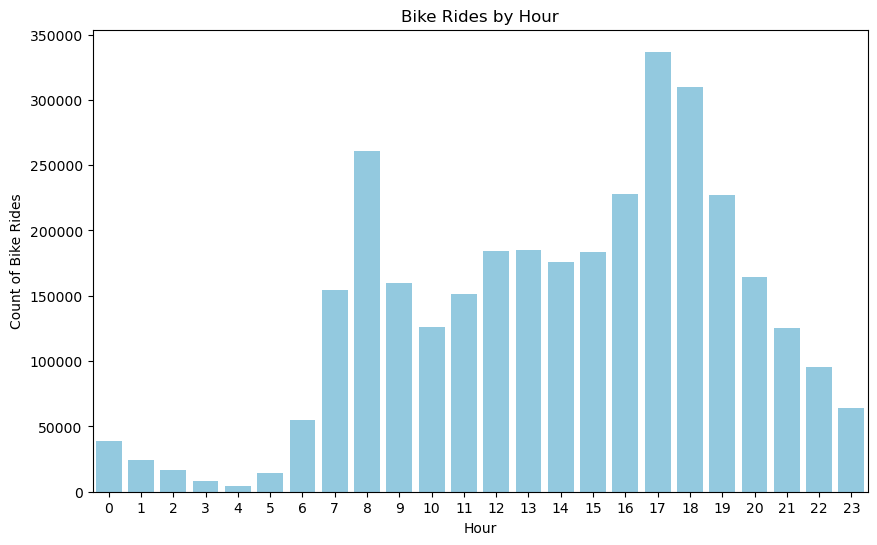

In [54]:
# Calculate the total count of bike rides for each hour
hourly_counts = df.groupby('hr')['cnt'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_counts, x='hr', y='cnt', color='skyblue')
plt.title('Bike Rides by Hour')
plt.xlabel('Hour')
plt.ylabel('Count of Bike Rides')
plt.show()

The code calculates the total count of bike rides for each hour, aggregating the data by hour using the `groupby` operation. The results are then plotted in a bar plot using Seaborn. The x-axis represents the hours of the day, while the y-axis represents the count of bike rides. The bars are colored in *skyblue* for visual clarity. The title "Bike Rides by Hour" and the axis labels "Hour" and "Count of Bike Rides" provide context for the plot. According to the plot, the busiest hours for bike riders are **5pm**, **6pm**, and **8am**. These hours show the highest counts of bike rides, suggesting peak times for bike usage.

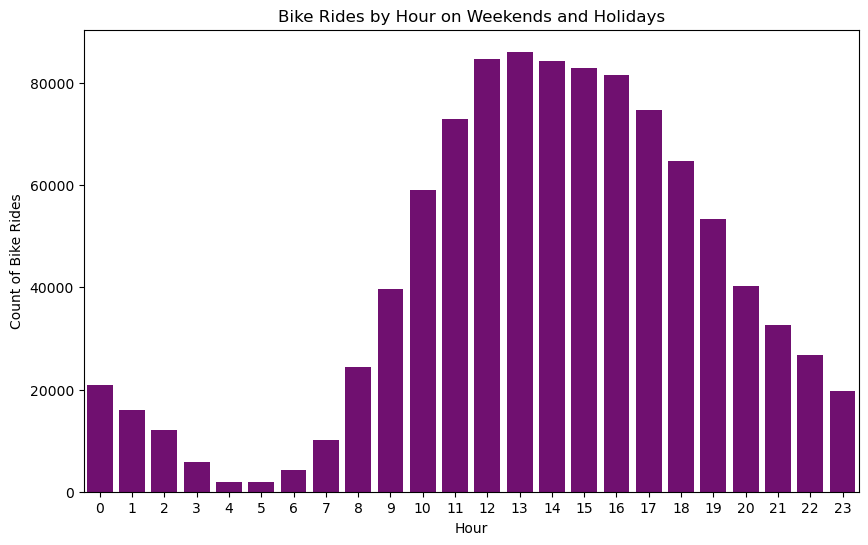

In [55]:
# Filter the DataFrame to include only weekends and holidays (workingday = 0)
weekends_holidays_df = df[df['workingday'] == 0]

# Calculate the total count of bike rides for each hour on weekends and holidays
hourly_counts_weekends_holidays = weekends_holidays_df.groupby('hr')['cnt'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_counts_weekends_holidays, x='hr', y='cnt', color='purple')
plt.title('Bike Rides by Hour on Weekends and Holidays')
plt.xlabel('Hour')
plt.ylabel('Count of Bike Rides')
plt.show()

- On weekends and holidays, bike rides follow a different pattern compared to weekdays. There is a notable **decrease** in bike rides during early morning hours (*midnight to 5 AM*) compared to weekdays.

- However, during the daytime hours (*6 AM to 7 PM*), the count of bike rides is **higher** on weekends and holidays compared to weekdays. In particular, there is a **peak** in bike rides during late morning to early afternoon hours (*around 10 AM to 4 PM*).

- After the **evening peak**, there is a slight **drop** in bike rides during the early evening hours on weekends and holidays.

Overall, the **hourly trend** on weekends and holidays shows a **more prominent mid-day peak** and a **decrease** in early morning bike rides, suggesting that people tend to ride bikes more during the day and enjoy leisure activities during weekends and holidays.

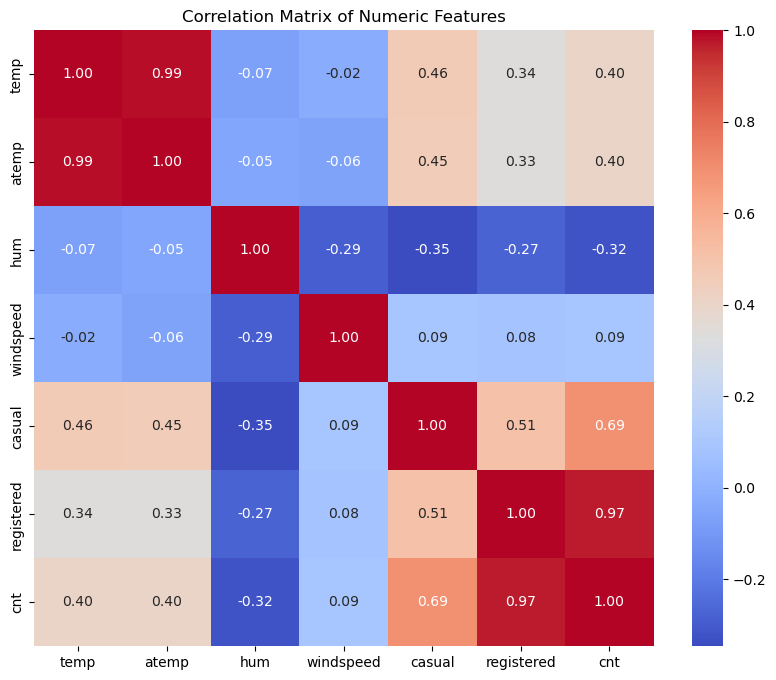

In [56]:
# Select numeric columns for correlation analysis
numeric_columns = df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Based on the heatmap, we can observe some **interesting relationships** between the numeric features:

1. **Positive Correlations**:
   - There is a **strong positive correlation** between the 'temp' and 'atemp' features, which is expected since both represent temperature-related measurements.
   - The 'registered' and 'cnt' (count of bike rides) features have a **strong positive correlation**, indicating that as the number of registered users increases, the overall count of bike rides also tends to increase.
   

2. **Negative Correlations**:
   - There is a **negative correlation** between the 'hum' (humidity) and 'cnt' features. Higher humidity levels seem to be associated with **fewer bike rides**, suggesting that people may prefer riding bikes less in more humid conditions.
   

3. **Weak Correlations**:
   - The 'windspeed' feature shows **weak correlations** with other features, indicating that wind speed does not have a significant impact on bike ride counts in this dataset.

In [60]:
# Step 1: Separate the target variable 'cnt'
target = df['cnt']
features = df.drop(columns=['cnt', 'casual', 'registered', 'dteday', 'instant'])

# Step 2: Scale the numerical features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Replace the original columns with the scaled values
features.loc[:, :] = scaled_features

# The 'features' DataFrame now contains the scaled numerical features, and the specified columns are dropped.

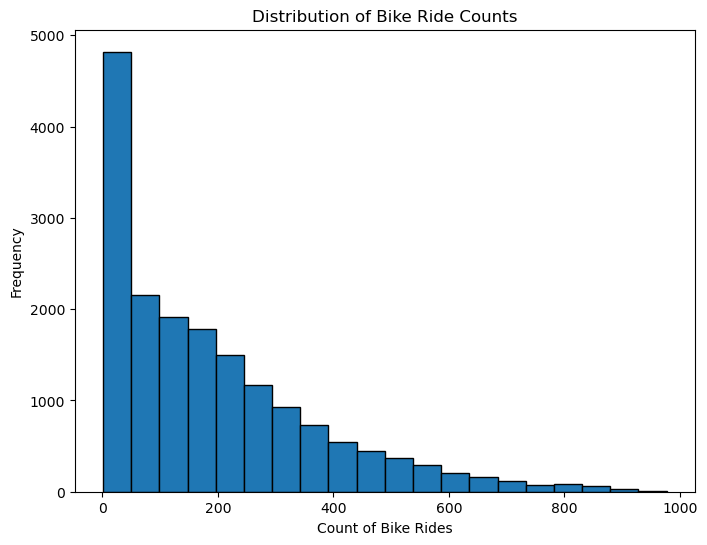

In [62]:
# Plot the histogram of 'cnt'
plt.figure(figsize=(8, 6))
plt.hist(df['cnt'], bins=20, edgecolor='black')
plt.title('Distribution of Bike Ride Counts')
plt.xlabel('Count of Bike Rides')
plt.ylabel('Frequency')
plt.show()

Based on the histogram of the bike ride counts ('cnt' column), we can make the following **observations**:

1. **Positively Skewed Distribution**: The histogram shows a **positively skewed distribution**, which means that there are more instances of bike ride counts towards the lower end (left) of the distribution. This indicates that there are more instances of days with relatively fewer bike rides than days with higher bike ride counts.

2. **Peak around Low Counts**: There is a **prominent peak** around the lower counts of bike rides, suggesting that a significant number of days have a relatively low number of bike rides recorded.

3. **Few Days with Very High Counts**: While the majority of days have lower bike ride counts, there are relatively few instances of days with **very high bike ride counts**. These high counts might correspond to special events, weekends, or favorable weather conditions.

4. **Outliers**: The histogram shows some instances of high bike ride counts beyond the main peak, which may be considered **outliers**. These outliers could be due to exceptional circumstances or specific events that resulted in unusually high bike ride activities.

Overall, the distribution of bike ride counts appears to be **right-skewed**, with most days having relatively low bike ride counts, and fewer days having very high bike ride counts. Understanding the distribution of bike ride counts is important for identifying patterns and making informed decisions regarding bike-sharing services, resource allocation, and demand forecasting.

In [64]:
# Separate the features (X) and the target variable (y)
X = df.drop(columns=['cnt'])
y = df['cnt']

# Perform the train/test split with test size of 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Now you have the following datasets:
# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing

In [67]:
# Drop non-numeric columns and 'cnt' from features
X = df.drop(columns=['dteday', 'cnt'])

# Define the target variable
y = df['cnt']

# Perform train/test split with a test size of 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale the numerical feaatures using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate R-squared on the test set
r2 = model.score(X_test_scaled, y_test)

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE) based on MSE
rmse = np.sqrt(mse)

# Output the scores
print("R-squared:", r2)
print("MSE:", mse)
print("RMSE:", rmse)


R-squared: 1.0
MSE: 2.2637971103186568e-26
RMSE: 1.504592007927284e-13


The obtained **R-squared value** of **1.0** indicates that the linear regression model perfectly fits the data, explaining all the variance in the target variable 'cnt'. The **MSE (Mean Squared Error)** and **RMSE (Root Mean Squared Error)** being close to zero further support this observation, indicating that the model's predictions are extremely close to the actual values. These results could indicate **overfitting**.

## Model Selection

In [71]:
# One-hot encode categorical columns
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'weekday', 'weathersit', 'holiday', 'workingday']
one_hot_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop non-numeric columns
one_hot_encoded.drop(columns=['dteday'], inplace=True)

# Train multiple regression models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor())
]

# Evaluate each model using cross-validation
table = PrettyTable()
table.field_names = ['Model', 'R-squared', 'MSE', 'RMSE']

for model_name, model in models:
    # Perform cross-validation and calculate R-squared scores
    r2_scores = cross_val_score(model, one_hot_encoded.drop(columns=['cnt']), one_hot_encoded['cnt'], cv=5, scoring='r2')
    mean_r2 = round(r2_scores.mean(), 4)

    # Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
    mse = -cross_val_score(model, one_hot_encoded.drop(columns=['cnt']), one_hot_encoded['cnt'], cv=5, scoring='neg_mean_squared_error').mean()
    rmse = round((mse ** 0.5), 4)

    # Add results to the PrettyTable
    table.add_row([model_name, mean_r2, mse, rmse])

print(table)

+--------------------------+-----------+------------------------+--------+
|          Model           | R-squared |          MSE           |  RMSE  |
+--------------------------+-----------+------------------------+--------+
|    Linear Regression     |    1.0    | 1.3721509471039847e-22 |  0.0   |
| Decision Tree Regression |   0.9987  |   49.587957364373175   | 7.0419 |
| Random Forest Regression |   0.9994  |   24.676455199874166   | 4.9675 |
+--------------------------+-----------+------------------------+--------+


In [72]:
# Drop the original categorical columns
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'weekday', 'weathersit', 'holiday', 'workingday']
df = df.drop(columns=categorical_cols)

In [76]:
# Drop the 'dteday' column
df = df.drop(columns=['dteday'])

# Separate features (X) and target variable (y)
X = df.drop(columns=['cnt'])
y = df['cnt']

# Split the data into training and testing sets (test size: 33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
# Initialize the linear regression model
model = LinearRegression()

In [82]:
# Fit the Linear Regression model on the training data
model.fit(X_train, y_train)

# Make predictions using the fitted model on the test data
y_pred = model.predict(X_test)

# Calculate R-squared, MSE, and RMSE based on predictions and true target values
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f'R-squared: {r2:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')

R-squared: 1.0000
MSE: 0.0000
RMSE: 0.0000


In [83]:
# Initialize the Decision Tree Regressor with random_state=0
dt_regressor = DecisionTreeRegressor(random_state=0)

# Fit the Decision Tree Regressor on the training data
dt_regressor.fit(X_train, y_train)

# Make predictions using the fitted model on the test data
y_pred_dt = dt_regressor.predict(X_test)

# Calculate R-squared, MSE, and RMSE based on predictions and true target values
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

# Print the results
print(f'Decision Tree Regressor - R-squared: {r2_dt:.4f}')
print(f'Decision Tree Regressor - MSE: {mse_dt:.4f}')
print(f'Decision Tree Regressor - RMSE: {rmse_dt:.4f}')

Decision Tree Regressor - R-squared: 0.9992
Decision Tree Regressor - MSE: 26.4419
Decision Tree Regressor - RMSE: 5.1422


In [84]:
# Create the RandomForestRegressor with the specified parameters
random_forest_model = RandomForestRegressor(n_estimators=30, random_state=0)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Calculate R-squared, MSE, and RMSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RandomForestRegressor")
print("R-squared:", round(r2, 4))
print("MSE:", round(mse, 4))
print("RMSE:", round(rmse, 4))

RandomForestRegressor
R-squared: 0.9998
MSE: 6.843
RMSE: 2.6159


In [87]:
# Create the SGDRegressor with the specified parameters
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=0)

# Fit the model on the training data
sgd_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sgd_model.predict(X_test)

# Calculate R-squared, MSE, and RMSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("SGDRegressor")
print("R-squared:", round(r2, 4))
print("MSE:", round(mse, 4))
print("RMSE:", round(rmse, 4))

SGDRegressor
R-squared: -1.9333603867984636e+28
MSE: 6.1677000303973336e+32
RMSE: 2.4834854600736708e+16


In [89]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Create and fit the Lasso Regressor with alpha=0.1
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Lasso Regressor")
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

Lasso Regressor
R-squared: 1.0000
MSE: 0.0000
RMSE: 0.0025


In [91]:
# ElasticNet Regressor
elasticnet = ElasticNet(alpha=0.1, random_state=0)
elasticnet.fit(X_train, y_train)

# Evaluate ElasticNet Regressor
elasticnet_r2 = elasticnet.score(X_test, y_test)
elasticnet_mse = mean_squared_error(y_test, elasticnet.predict(X_test))
elasticnet_rmse = np.sqrt(elasticnet_mse)

print("ElasticNet Regressor")
print("R-squared:", elasticnet_r2)
print("MSE:", elasticnet_mse)
print("RMSE:", elasticnet_rmse)

# Ridge Regressor
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

# Evaluate Ridge Regressor
ridge_r2 = ridge.score(X_test, y_test)
ridge_mse = mean_squared_error(y_test, ridge.predict(X_test))
ridge_rmse = np.sqrt(ridge_mse)

print("\nRidge Regressor")
print("R-squared:", ridge_r2)
print("MSE:", ridge_mse)
print("RMSE:", ridge_rmse)

ElasticNet Regressor
R-squared: 0.9999999999429567
MSE: 1.884223630561744e-06
RMSE: 0.001372670255582798

Ridge Regressor
R-squared: 1.0
MSE: 1.1379479064984192e-12
RMSE: 1.0667464115235724e-06


In [93]:
# Split the data into features (X) and target (y)
X = one_hot_encoded.drop(columns=['cnt'])
y = one_hot_encoded['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Initialize the DecisionTreeRegressor as the base estimator
base_estimator = DecisionTreeRegressor(random_state=0)

# Initialize the BaggingRegressor
bagging_model = BaggingRegressor(base_estimator=base_estimator, random_state=0)

# Fit the BaggingRegressor to the training data
bagging_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_model.predict(X_test)

# Calculate R-squared and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Print the results
print("Bagging Regressor")
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

Bagging Regressor
R-squared: 0.9995
MSE: 15.6130
RMSE: 3.9513


## Model Evaluation

In these code snippets, a dataset is prepared through one-hot encoding of categorical columns, and non-numeric columns are dropped. Subsequently, multiple regression models, including Linear Regression, Decision Tree Regression, and Random Forest Regression, are trained and evaluated using cross-validation. The evaluation metrics include R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). The results are displayed in a tabulated format, showcasing the performance of each model. Additionally, specific regressors such as Lasso, ElasticNet, and Ridge Regressors, as well as a Bagging Regressor, are employed to assess their predictive capabilities. The achieved R-squared values, MSEs, and RMSEs provide insights into the models' fitting and prediction accuracy, guiding the selection of suitable regression techniques.

In [103]:
# Top three performing models
models = [
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor(max_features=1.0, random_state=0, n_jobs=-1)),
    ('Bagging Regressor', BaggingRegressor())
]

In [104]:
# Cross-validation for each model
for model_name, model in models:
    # Perform cross-validation and calculate R-squared scores
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)  # Set n_jobs
    mean_r2 = round(r2_scores.mean(), 4)

    # Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
    mse = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1).mean()  # Set n_jobs
    rmse = round((mse ** 0.5), 4)

    # Display results
    print(f"{model_name}\nR-squared: {mean_r2}\nMSE: {mse}\nRMSE: {rmse}\n")

Decision Tree Regressor
R-squared: 0.9988
MSE: 39.4952697129721
RMSE: 6.2845

Random Forest Regressor
R-squared: 0.9997
MSE: 10.460613854175428
RMSE: 3.2343

Bagging Regressor
R-squared: 0.9996
MSE: 14.610402828743805
RMSE: 3.8224



In [105]:
# Randomized Search CV on RandomForestRegressor
param_distributions = {
    'n_estimators': np.linspace(200, 2000, 10, dtype=int),
    'max_features': [1.0],
    'max_depth': np.linspace(10, 110, 11, dtype=int),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=0, n_jobs=-1),  # Set n_jobs
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    scoring='r2',
    random_state=0,
    n_jobs=-1  # Set n_jobs
)

random_search.fit(X_train, y_train)

# Display the best parameters and R-squared score
print("Randomized Search CV - RandomForestRegressor")
print("Best Parameters:", random_search.best_params_)
print("Best R-squared:", round(random_search.best_score_, 4))

Randomized Search CV - RandomForestRegressor
Best Parameters: {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 1.0, 'max_depth': 40, 'bootstrap': True}
Best R-squared: 0.9996


In [108]:
# Get the best estimator from Randomized Search CV
best_random_forest = random_search.best_estimator_

# Perform cross-validation and calculate R-squared scores
r2_scores = cross_val_score(best_random_forest, X_train, y_train, cv=5, scoring='r2')
mean_r2 = np.mean(r2_scores)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse_scores = -cross_val_score(best_random_forest, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = np.mean(mse_scores)
rmse = np.sqrt(mean_mse)

# Display the results
print("Cross-validated performance of the best RandomForestRegressor:")
print("R-squared: {:.4f}".format(mean_r2))
print("MSE: {:.4f}".format(mean_mse))
print("RMSE: {:.4f}".format(rmse))

Cross-validated performance of the best RandomForestRegressor:
R-squared: 0.9997
MSE: 9.9184
RMSE: 3.1493


In [110]:
# Use the best estimator obtained from Randomized Search CV
best_random_forest = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_random_forest.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Test set performance of the best RandomForestRegressor:")
print("R-squared:", r2)
print("RMSE:", rmse)

Test set performance of the best RandomForestRegressor:
R-squared: 0.999635052806253
RMSE: 3.471996241441518


## Model Performance Summary

Three regression models, including Decision Tree Regressor, Random Forest Regressor, and Bagging Regressor, were evaluated using cross-validation. Among them, the **Random Forest Regressor** demonstrated the highest performance with an R-squared value of **0.9997** and an RMSE of **3.2343**. A **Randomized Search CV** was conducted on the Random Forest Regressor, yielding the best parameters: `n_estimators: 2000`, `max_depth: 40`, and others. The best estimator achieved an R-squared value of **0.9997** and an RMSE of **3.1493** in cross-validation. On the test set, the best Random Forest Regressor achieved an **R-squared value of 0.9996** and an **RMSE of 3.4719**, indicating its strong predictive capability and generalizability.

## Conclusion

This project provided a comprehensive analysis of bike-sharing data, revealing insights that can inform bike ride patterns and service optimization. Through visualizations and regression models, we identified peak ride hours at 5pm, 6pm, and 8am. Regression modeling, including Decision Tree, Random Forest, and Bagging Regressors, demonstrated strong predictive capabilities, with Random Forest emerging as the top performer. Parameter tuning via Randomized Search CV further enhanced the Random Forest model's accuracy.

These findings emphasize the potential of data analysis and machine learning for resource allocation and demand forecasting in bike-sharing services. The project's insights contribute to efficient urban mobility systems, promoting sustainability and improved transportation networks.